In [1]:
import sys
import os
import numpy as np
from numpy import mean
np.seterr(divide='ignore', invalid='ignore')
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

import julian
import datetime

from statistics import stdev
from statistics import mean

from matplotlib import rc
rc('text', usetex=True)
rc('font', family='serif',size=14)

In [2]:
ls

2022_May_week4_Beuermann_Beuermann_ephemeris_lnLTT.out
2022_May_week4_Schwope_Beuermann_ephemeris_lnquad.out
Combined_model.ipynb
Combined_model.pdf
Combined_model_fit_Beuermann_ephemeris.ipynb
Combined_model_fit_lnLTT_Beuermann_ephemeris.pdf
Combined_model_fit_lnquad_Beuermann_ephemeris.pdf
interporate_lnLTT_fit_Beuermann_combined.out
interporate_lnquad_fit_combined.out


In [3]:
#Beuermann's ephemeris
T0_bjd = 48773.21461
T0_bjd_err = 0.00009
P0_day = 0.0623628426
P0_day_err = 0.0000000006



In [4]:
#Plot O-C vs BJD
InputFileInput  = "/Users/kittipongwangnok/Documents/PhD_Thesis_Analysis/NARIT_weekly_plan_2020/2022_June/2022_June_week1/Thiswork2022/oc_linear_dpleo_Beuermann_Schwope_Kittipong_ephemeris_determination.txt"
Data   = np.genfromtxt(InputFileInput)
BJD = Data[:,3]
Epoch = (BJD - T0_bjd)/P0_day
OC_s = Data[:,4]
OC_s_err = Data[:,5]

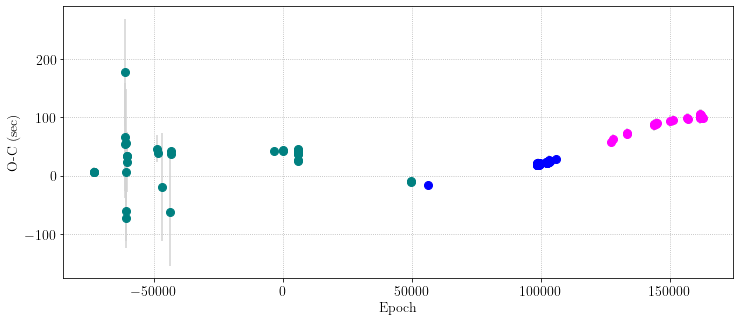

In [5]:
#Plotgraph
N_BMJD = 2400000
fig=plt.figure(figsize=(12, 5))
plt.errorbar(Epoch[0:32], OC_s[0:32], yerr= OC_s_err[0:32], fmt='o', markersize=8, color='teal', ecolor='lightgray', label = 'Schwope et al.(2002)')
plt.errorbar(Epoch[33:88], OC_s[33:88], yerr= OC_s_err[33:88], fmt='o', markersize=8, color='blue', ecolor='lightgray', label = 'Beuermann et al. (2011)')
plt.errorbar(Epoch[89:112], OC_s[89:112], yerr= OC_s_err[89:112], fmt='o', markersize=8, color='magenta', ecolor='lightgray', label = 'This work')
# create a line plot for the mapping function
#plt.xlim(-6000,6000)
#plt.ylim(-200,200)
#plt.ylim(-40,60)
#plt.xlabel('BJD-'+str(N_BMJD))
plt.xlabel('Epoch')
plt.ylabel('O-C (sec)')
plt.grid(linestyle='dotted')
#plt.legend(loc="best")
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig("DP_Leo_LTT_fit_weighted_data_combined_lnsin_fit.pdf", dpi=1200)
plt.show()

### Quadratic fit

In [6]:
x = BJD
y = OC_s
dy = OC_s_err

len_x = len(x)
#print(x)
#print(len_x)

In [7]:
def quad_fit(x,m,c,Q):
    Epoch = (x - T0_bjd)/P0_day 
    return m*Epoch + c + Q*Epoch*Epoch

In [8]:
import scipy.optimize as optimization  
#guess = (m,c,Q)
#params, params_covariance = optimization.curve_fit(quad_fit, x, y,sigma=dy, absolute_sigma=False,p0=guess)

params, params_covariance = optimization.curve_fit(quad_fit, x, y,sigma=dy, absolute_sigma=False)

m = params[0]
c = params[1]
Q = params[2]

dm = params_covariance[0,0]
dc = params_covariance[1,1]
dQ = params_covariance[2,2]

oc_quad_fit = quad_fit(x,*params)

In [9]:
#The ephemeris from above
T0 = T0_bjd
dT0 = T0_bjd_err
P0 = P0_day
dP0 = P0_day_err


#print('The fitting parameters:')
##T
T = c/(24*60*60) + T0
dT = np.sqrt((((dc**(0.5))/(24*60*60))**2) + (dT0**2))
#T = BJD0
#print('T0 (BJD):',T)
#print('dT0 (BJD):',dT)

##P
Period = (m/(24*60*60)) + P0
dPeriod = np.sqrt((((dm**(0.5))/(24*60*60))**2) + (dP0**2))
#print('P0 (days):',Period)
#print('dP0 (days):',dPeriod)


#Period decrease
P_dot = 2*Q/(P0*24*60*60)
dP_dot = (2*(P0*24*60*60)*(dQ**0.5) - 2*Q*(dP0*24*60*60))/((P0*24*60*60)**2)
#print('P_dot (s/s):',P_dot)
#print('dP_dot (s/s):',dP_dot)

print("The fitting parameters:")
print('T0 = '+str('%0.5f' %(T)),'+/-', str('%0.5f' %(dT)), "[days]")
print('P_bin = '+str('%0.10f' %(Period)),'+/-', str('%0.10f' %(dPeriod)), "[days]")
print('P_dot = '+str('%0.13f' %(P_dot)),'+/-', str('%0.13f' %(dP_dot)), "[s/s]")

The fitting parameters:
T0 = 48773.21495 +/- 0.00009 [days]
P_bin = 0.0623628385 +/- 0.0000000010 [days]
P_dot = 0.0000000000015 +/- 0.0000000000002 [s/s]


In [10]:
x_min, x_max = np.amin(x), np.amax(x)
x_line = np.linspace(x_min, x_max)
#print(len(x_line))
y_line = quad_fit(x_line, *params) #### For all interporation 
ys = quad_fit(x, *params)

#print(len(y_line))
#print(len(ys))

Res_lnquad_fit = y - ys
np.savetxt("2022_May_week4_Schwope_Beuermann_ephemeris_lnquad.out", np.c_[x, (x-T)/Period, Res_lnquad_fit, dy])

#np.savetxt('TNO_ephemeris_determination_1.out', np.c_[x_line, y_line, y, dy], fmt="%.5f")

#Reduced_chisqrt
m = 3
dof = len_x - m
Chi_sqr = ((y - ys)**2/(dy)**2)/dof
Reduced_chisq_lnquad= sum(Chi_sqr)
print(Reduced_chisq_lnquad)

9.549514847343225


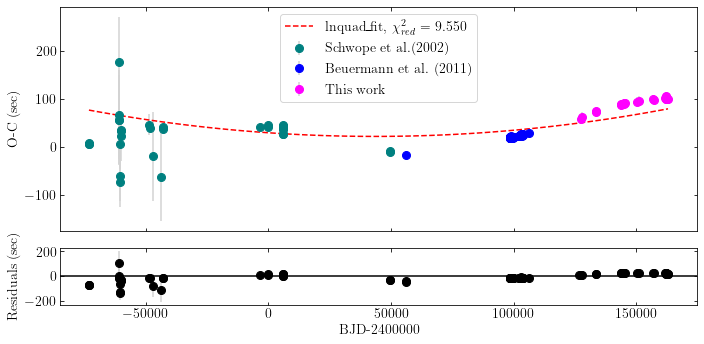

In [11]:
N_BMJD = 2400000
fig, (ax0, ax1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1]}, sharex=True, sharey=False, figsize=(10, 5), tight_layout=True)
plt.xlabel('BJD-'+str(N_BMJD))

ax0.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
ax1.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

ax0.errorbar(Epoch[0:32], OC_s[0:32], yerr= OC_s_err[0:32], fmt='o', markersize=8, color='teal', ecolor='lightgray', label = 'Schwope et al.(2002)')
ax0.errorbar(Epoch[33:88], OC_s[33:88], yerr= OC_s_err[33:88], fmt='o', markersize=8, color='blue', ecolor='lightgray', label = 'Beuermann et al. (2011)')
ax0.errorbar(Epoch[89:112], OC_s[89:112], yerr= OC_s_err[89:112], fmt='o', markersize=8, color='magenta', ecolor='lightgray', label = 'This work')
ax0.plot((x_line-T)/Period, y_line, '--', color='red',label='lnquad\_fit, $\chi_{red}^{2}$ = '+str('%0.3f' %(Reduced_chisq_lnquad)))

#ax0.set_ylim(-40,60)

ax0.set_ylabel('O-C (sec)')
ax1.set_ylabel('Residuals (sec)')

ax1.errorbar((x-T)/Period, Res_lnquad_fit, yerr= dy, fmt='o', markersize=8, color='black', ecolor='lightgray')

ax1.axhline(y=0, color='black', linestyle='-')
ax0.legend(loc="best")

#plt.savefig("2022_Feb_week4_new_ephemeris_sin_fit_Res.jpg", dpi=1000)

plt.show()

In [12]:
N = 700
x_range = [i for i in range(N)]
x_range_a = [i for i in range(N)]
y_range = [i for i in range(len(x_range))]
step=1*100
#step

interporate = []
for i in range(300, N):
    x_range[i] = i*step
    x_range_a[i] = x_range
    Epoch_combined = np.round((x_range[i] - T)/Period)
    y_range[i] = quad_fit(x_range[i], *params)
#    print(x_range[i], y_range[i], Epoch)
    interporate.append('%0.0f %0.2f %0.10f %0.10f %0.0f %0.5f' %(i, x_range[i], T, Period, Epoch_combined, y_range[i]))
    
data_out = interporate
f = open("interporate_lnquad_fit_combined.out", 'w')
for i in range(len(data_out)):
    f.write(str(data_out[i])+ '\n')
f.close()

InputFile_out = "interporate_lnquad_fit_combined.out"
Data_out   = np.genfromtxt(InputFile_out)

#Read the wd data: BJD vs. Relative flux
x_range_lnquad_combined = Data_out[:,1]
Epoch_range_lnquad_combined = Data_out[:,4]
y_range_lnquad_combined = Data_out[:,5]

#print(y_range)
#print(Epoch_range_lnquad_combined)

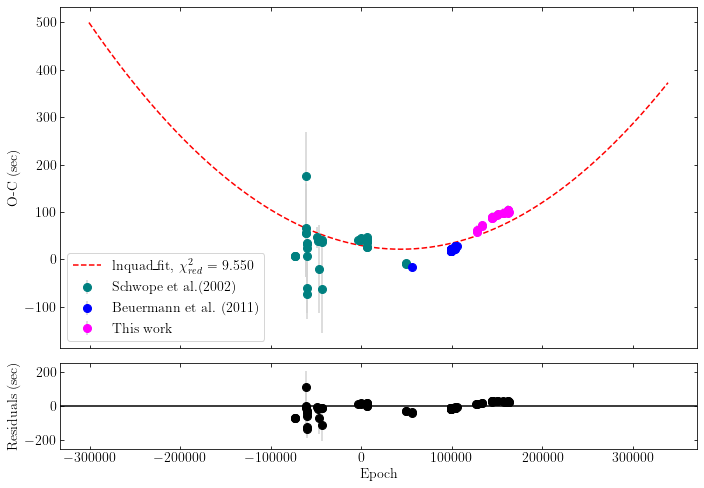

In [13]:
fig, (ax0, ax1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1]}, sharex=True, sharey=False, figsize=(10, 7), tight_layout=True)
plt.xlabel('Epoch')

ax0.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
ax1.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

ax0.errorbar(Epoch[0:32], OC_s[0:32], yerr= OC_s_err[0:32], fmt='o', markersize=8, color='teal', ecolor='lightgray', label = 'Schwope et al.(2002)')
ax0.errorbar(Epoch[33:88], OC_s[33:88], yerr= OC_s_err[33:88], fmt='o', markersize=8, color='blue', ecolor='lightgray', label = 'Beuermann et al. (2011)')
ax0.errorbar(Epoch[89:112], OC_s[89:112], yerr= OC_s_err[89:112], fmt='o', markersize=8, color='magenta', ecolor='lightgray', label = 'This work')
ax0.plot(Epoch_range_lnquad_combined, y_range_lnquad_combined, '--', color='red',label='lnquad\_fit, $\chi_{red}^{2}$ = '+str('%0.3f' %(Reduced_chisq_lnquad)))
ax0.legend(loc="best")
ax0.set_ylabel('O-C (sec)')
ax1.set_ylabel('Residuals (sec)')

ax1.set_ylim(-250,250)

ax1.errorbar((x-T)/Period, Res_lnquad_fit, yerr= dy, fmt='o', markersize=8, color='black', ecolor='lightgray')
ax1.axhline(y=0, color='black', linestyle='-')
plt.savefig("Combined_model_fit_lnquad_Beuermann_ephemeris.pdf", dpi=1200)
plt.show()

### LTT fit

In [14]:
#m = 0
#c = 0
#K = 33.7       #m/s
#P = 10220       #days
#e = 0.39               #No-unit
#w = -1.36           #rad
#tau = 53025   #days

m = 0
c = 0
K = 40       #m/s
P = 10220       #days
e = 0.5               #No-unit
w = -1          #rad
tau = 53000   #days

#set3
#m = 0.0002910110092493555 
#c = 5.799593360903959
#K = 45.52
#P = 12643.22
#e = 0.15
#w = -2.09
#tau = 52060




from scipy.optimize import fsolve
from scipy.optimize import curve_fit

def TAno(P,tau,e,t):
    MAno = 2*np.pi/P*((t-tau)%P)
    EFunc = lambda x: x-e*np.sin(x)-MAno
    EAno = fsolve(EFunc, MAno)
    f = np.arccos((np.cos(EAno)-e)/(1-e*np.cos(EAno)))
    f = np.where(EAno>np.pi,-f,f)
    return f

def lnLTT_fit(t,m,c,K,P,e,w,tau):
    f = TAno(P,tau,e,t)
    Epoch = (t - T0_bjd)/P0_day
    return m*Epoch + c + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))

In [15]:
import scipy.optimize as optimization  
guess = (m,c,K,P,e,w,tau)
params, params_covariance = optimization.curve_fit(lnLTT_fit, x, y,sigma=dy, absolute_sigma=True,p0=guess,maxfev = 10000)

m = params[0]
c = params[1]
K = params[2]
P = params[3]
e = params[4]
w = params[5]
tau = params[6]


dm = params_covariance[0,0]
dc = params_covariance[1,1]
dK = params_covariance[2,2]
dP = params_covariance[3,3]
de = params_covariance[4,4]
dw = params_covariance[5,5]
dtau = params_covariance[6,6]

print(m,c)

0.00029101264466209774 5.799274332576952


In [16]:
oc_lnLTT_fit = lnLTT_fit(x,*params)

if e<0:
    w -= np.pi
    e *= -1
    w_deg = w*180/np.pi

    
    
#The ephemeris from above
T0 = T0_bjd
dT0 = T0_bjd_err
P0 = P0_day
dP0 = P0_day_err


##T
T = c/(24*60*60) + T0
dT = np.sqrt((((dc**(0.5))/(24*60*60))**2) + (dT0**2))
#dT = np.sqrt((dBJD0**2))
#T = BJD0
#print(T)
#print(dT)

##P
Period = (m/(24*60*60)) + P0
dPeriod = np.sqrt((((dm**(0.5))/(24*60*60))**2) + (dP0**2))
#dPeriod = np.sqrt((dP0**2))
#print(P)
#print(dP)

#print("The fitting parameters:")
#print("dP =", m, "+/-", dm**0.5, "[s]")
#print("dT0 =", c, "+/-", dc**0.5, "[s]")
#print("T0(BJD) =", T, "+/-", dT, "[days]")
#print("P_bin =", Period, "+/-", dPeriod, "[days]")
#print("K =", K, "+/-", dK**0.5, "[s]")
#print("P_d =", P, "+/-", dP**0.5, "[days]")
#print("P_yr =", P/365.25, "+/-", (dP**0.5)/365.25, "[years]")
#print("e =", e, "+/-", de**0.5, "[-]")
#print("w =", w, "+/-", dw**0.5, "[rad]")
#print("w_deg =", w*(180/np.pi), "+/-", dw**0.5*(180/np.pi), "[deg]")
#print("tau =", tau, "+/-", dtau**0.5, "[days]")

print("The fitting parameters:")
print('T0 = '+str('%0.5f' %(T)),'+/-', str('%0.5f' %(dT)), "[days]")
print('P_bin = '+str('%0.10f' %(Period)),'+/-', str('%0.10f' %(dPeriod)), "[days]")
print('K = '+str('%0.2f' %(K)),'+/-', str('%0.2f' %(dK**0.5)), "[s]")
print('P_d = '+str('%0.2f' %(P)),'+/-', str('%0.2f' %(dP**0.5)), "[days]")
print('P_yr = '+str('%0.2f' %(P/365.25)),'+/-', str('%0.2f' %((dP**0.5)/365.25)), "[years]")
print('e = '+str('%0.2f' %(e)),'+/-', str('%0.2f' %(de**0.5)), "[-]")
print('w = '+str('%0.2f' %(w)),'+/-', str('%0.2f' %(dw**0.5)), "[rad]")
print('w_deg = '+str('%0.2f' %(w*(180/np.pi))),'+/-', str('%0.2f' %(dw**0.5*(180/np.pi))), "[deg]")
print('tau = '+str('%0.0f' %(tau)),'+/-', str('%0.0f' %(dtau**0.5)), "[days]")

The fitting parameters:
T0 = 48773.21468 +/- 0.00013 [days]
P_bin = 0.0623628460 +/- 0.0000000007 [days]
K = 45.52 +/- 1.52 [s]
P_d = 12643.25 +/- 531.11 [days]
P_yr = 34.62 +/- 1.45 [years]
e = 0.15 +/- 0.09 [-]
w = -2.09 +/- 0.63 [rad]
w_deg = -119.94 +/- 36.38 [deg]
tau = 52060 +/- 1276 [days]


In [17]:
x_min, x_max = np.amin(x), np.amax(x)
x_line = np.linspace(x_min, x_max)
y_line = lnLTT_fit(x_line, *params) #### For all interporation 
#print(y_line)
#print(ocfit)
#print(x)

#print(len(x_line))

Res_lnLTT_fit = y - oc_lnLTT_fit
np.savetxt("2022_May_week4_Beuermann_Beuermann_ephemeris_lnLTT.out", np.c_[x,(x-T)/Period, Res_lnLTT_fit, dy])

#Reduced_chisqrt
n = 7
dof = len_x - n
Chi_sqr = ((y - oc_lnLTT_fit)**2/(dy)**2)/dof
Reduced_chisq_lnLTT = sum(Chi_sqr)
print("Reduced_chisq:",Reduced_chisq_lnLTT)

Reduced_chisq: 0.7143219911208237


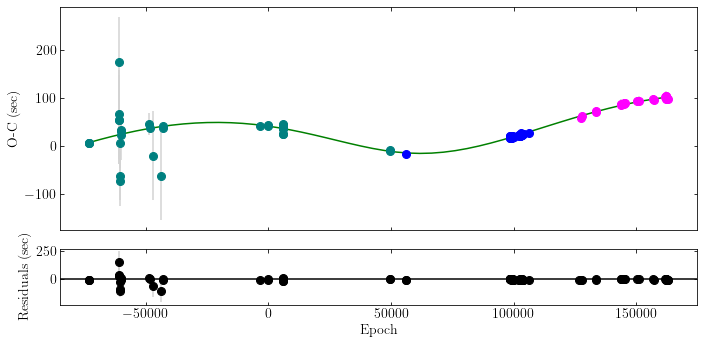

In [18]:
N_BMJD = 2400000
fig, (ax0, ax1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1]}, sharex=True, sharey=False, figsize=(10, 5), tight_layout=True)
#plt.xlabel('BJD-'+str(N_BMJD))
plt.xlabel('Epoch')

ax0.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
ax1.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

#ax0.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray')
ax0.errorbar(Epoch[0:32], OC_s[0:32], yerr= OC_s_err[0:32], fmt='o', markersize=8, color='teal', ecolor='lightgray', label = 'Schwope et al.(2002)')
ax0.errorbar(Epoch[33:88], OC_s[33:88], yerr= OC_s_err[33:88], fmt='o', markersize=8, color='blue', ecolor='lightgray', label = 'Beuermann et al. (2011)')
ax0.errorbar(Epoch[89:112], OC_s[89:112], yerr= OC_s_err[89:112], fmt='o', markersize=8, color='magenta', ecolor='lightgray', label = 'This work')
ax0.plot((x_line-T)/Period, y_line, '-', color='green')

#ax0.set_ylim(-40,60)

ax0.set_ylabel('O-C (sec)')
ax1.set_ylabel('Residuals (sec)')

ax1.errorbar((x-T)/Period, Res_lnLTT_fit, yerr= dy, fmt='o', markersize=8, color='black', ecolor='lightgray')

ax1.axhline(y=0, color='black', linestyle='-')

#plt.savefig("2022_Feb_week4_new_ephemeris_sin_fit_Res.jpg", dpi=1000)

plt.show()

In [19]:
N = 700
x_range = [i for i in range(N)]
x_range_a = [i for i in range(N)]
y_range = [i for i in range(len(x_range))]
step=1*100
#step

interporate = []
for i in range(300, N):
    x_range[i] = i*step
    Epoch_combined = np.round((x_range[i] - T)/Period)
    y_range[i] = lnLTT_fit(x_range[i], *params)
#    print(x_range[i], y_range[i], Epoch)
    interporate.append('%0.0f %0.2f %0.10f %0.10f %0.0f %0.5f' %(i, x_range[i], T, Period, Epoch_combined, y_range[i]))
    
data_out = interporate
f = open("interporate_lnLTT_fit_Beuermann_combined.out", 'w')
for i in range(len(data_out)):
    f.write(str(data_out[i])+ '\n')
f.close()

InputFile_out = "interporate_lnLTT_fit_Beuermann_combined.out"
Data_out   = np.genfromtxt(InputFile_out)

#Read the wd data: BJD vs. Relative flux
x_lnLTT_Beuermann_combined = Data_out[:,1]
Epoch_lnLTT_Beuermann_combined = Data_out[:,4]
y_lnLTT_Beuermann_combined = Data_out[:,5]

#print(y_range)

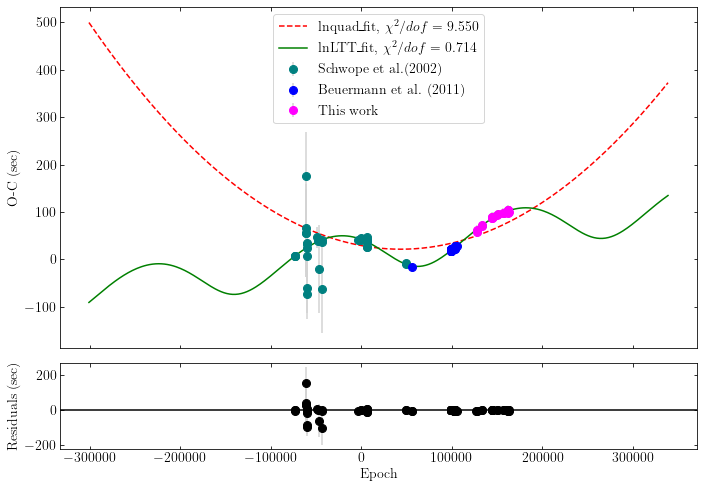

In [20]:
fig, (ax0, ax1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1]}, sharex=True, sharey=False, figsize=(10, 7), tight_layout=True)
plt.xlabel('Epoch')

ax0.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
ax1.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

#ax0.errorbar((x-T)/Period, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray')
ax0.errorbar(Epoch[0:32], OC_s[0:32], yerr= OC_s_err[0:32], fmt='o', markersize=8, color='teal', ecolor='lightgray', label = 'Schwope et al.(2002)')
ax0.errorbar(Epoch[33:88], OC_s[33:88], yerr= OC_s_err[33:88], fmt='o', markersize=8, color='blue', ecolor='lightgray', label = 'Beuermann et al. (2011)')
ax0.errorbar(Epoch[89:112], OC_s[89:112], yerr= OC_s_err[89:112], fmt='o', markersize=8, color='magenta', ecolor='lightgray', label = 'This work')
ax0.plot(Epoch_range_lnquad_combined, y_range_lnquad_combined, '--', color='red',label='lnquad\_fit, $\chi^{2}/dof$ = '+str('%0.3f' %(Reduced_chisq_lnquad)))
ax0.plot(Epoch_lnLTT_Beuermann_combined, y_lnLTT_Beuermann_combined, '-', color='green',label='lnLTT\_fit, $\chi^{2}/dof$ = '+str('%0.3f' %(Reduced_chisq_lnLTT)))
ax0.legend(loc="best")
ax0.set_ylabel('O-C (sec)')
ax1.set_ylabel('Residuals (sec)')


ax1.errorbar((x-T)/Period, Res_lnLTT_fit, yerr= dy, fmt='o', markersize=8, color='black', ecolor='lightgray')
ax1.axhline(y=0, color='black', linestyle='-')
plt.savefig("Combined_model_fit_lnLTT_Beuermann_ephemeris.pdf", dpi=1200)
plt.show()